# Aufgabe zu Daten Lebensdauer:

In [1]:
import numpy as np
import pandas as pd
from src.n_way_anova import Anova, plot_linear_effects
from src.alias import get_interaction_table,get_aliases

In [2]:
df = pd.read_csv("./Daten/Lebensdauer.csv")
df

,run,A,B,C,D
0,1,-1,-1,-1,22
1,1,-1,-1,-1,31
2,2,1,-1,-1,32
3,2,1,-1,-1,43
4,3,-1,1,-1,35
5,3,-1,1,-1,34
6,4,1,1,-1,55
7,4,1,1,-1,47
8,5,-1,-1,1,44
9,5,-1,-1,1,45


### Fraktion:

Es ist ein Vollfaktorieller $2^3$-Plan mit 2 Messwiderholungen

### Aliasing/definierende Gleichung:

In [3]:
for a in get_aliases(df[["A", "B", "C"]].values):
    print(a)

- Das Aliasing ist leer was die Aussage über einen Vollfaktoriellen-Plan bestätigt.
- Die definierende Gleichung ist I = ABC

### Freiheitsgrade:

- Es werden 8 Koeffizienten berechnet mit 16 Messungen, es bleiben 8 Freiheitsgrade.

### Lineare Effekte:

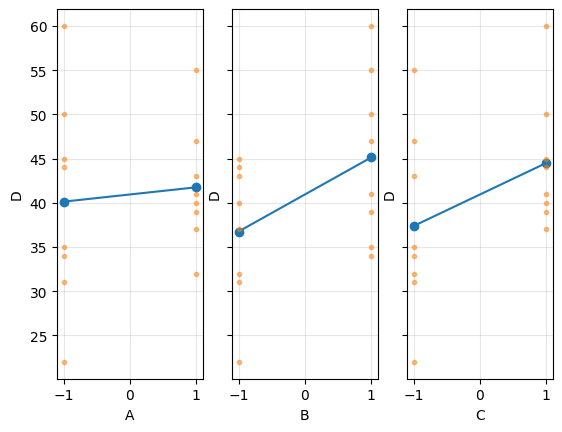

In [4]:
# Lineare Effekt der Haupteffekte
plot_linear_effects(df, ["A", "B", "C"], "D")

### Signifikante Effekte:

c:\Users\mauro\OneDrive - OST\Unterricht\HS2024\DOE\Prüfung\venvTest\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


Shapiro p-value: 0.35455233450828294
The residuals seem normal distributed.


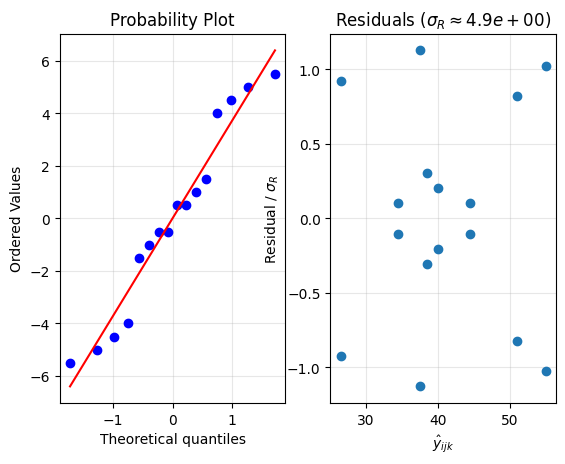

,df,sum_sq,mean_sq,F,PR(>F)
A:C,1.0,588.0625,588.0625,24.695538,0.001094
B,1.0,280.5625,280.5625,11.782152,0.008922
C,1.0,203.0625,203.0625,8.527559,0.019285
A:B:C,1.0,52.5625,52.5625,2.207349,0.175659
B:C,1.0,22.5625,22.5625,0.947507,0.358864
A,1.0,10.5625,10.5625,0.443570,0.524141
A:B,1.0,3.0625,3.0625,0.128609,0.729158
Residual,8.0,190.5000,23.8125,NaN,NaN


In [5]:
anova = Anova(df, "D ~ A * B * C")
anova.check()
anova.result

- Es kann Normalverteilung angenommen werden.
- Der p-Wert wurde als 0.05 gewählt.
- B, C, A:C sind signifikant!

### Regressionsmodel:

c:\Users\mauro\OneDrive - OST\Unterricht\HS2024\DOE\Prüfung\venvTest\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


Shapiro p-value: 0.6073211578541938
The residuals seem normal distributed.


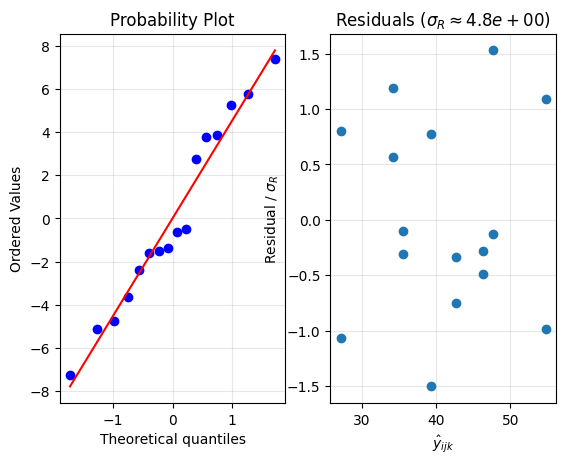

,df,sum_sq,mean_sq,F,PR(>F)
A:C,1.0,588.0625,588.062500,25.270367,0.000296
B,1.0,280.5625,280.562500,12.056401,0.004612
C,1.0,203.0625,203.062500,8.726052,0.012055
Residual,12.0,279.2500,23.270833,NaN,NaN


In [6]:
# Anova der Signifikanten Effekte:
anova = Anova(df, "D ~ B + C + A:C")
anova.check()
anova.result

In [7]:
anova.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     15.35
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           0.000207
Time:                        14:26:08   Log-Likelihood:                -45.579
No. Observations:                  16   AIC:                             99.16
Df Residuals:                      12   BIC:                             102.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.9375      1.206     33.945      0.000      38.310      43.565
B              4.1875      1.206      3.472      0.005       1.560       6.815
C              3.5625      1.206      2.954      0.012       0.935       6.190
A:C           -6.0625      1.206     -5.027      0.000      -8.690      -3.435
==============================================================================
Omnibus:                        1.183   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                0.802
Skew:                           0.148   Prob(JB):                        0.670
Kurtosis:                       1.944   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

D = 40.9 + 4.2 B + 3.5 C - 6.1 A:C

### Schätzer für die Prozessstreuung:

c:\Users\mauro\OneDrive - OST\Unterricht\HS2024\DOE\Prüfung\venvTest\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


Shapiro p-value: 0.6073211578541938
The residuals seem normal distributed.


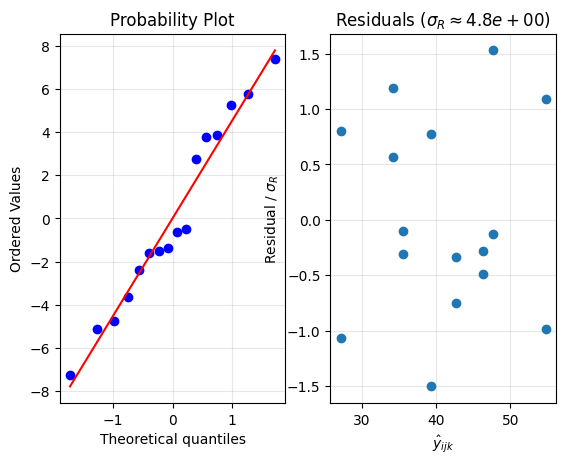

,df,sum_sq,mean_sq,F,PR(>F)
A:C,1.0,588.0625,588.062500,25.270367,0.000296
B,1.0,280.5625,280.562500,12.056401,0.004612
C,1.0,203.0625,203.062500,8.726052,0.012055
Residual,12.0,279.2500,23.270833,NaN,NaN


In [8]:
# Anova für das Regressionsmodel (hier Signifikante Effekte)
anova = Anova(df, "D ~ B + C + A:C")
anova.check()
anova.result

In [9]:
print(f"Schätzer für Streuung = {np.sqrt(23.270833)}")

Schätzer für Streuung = 4.82398517825252


Die Streuung ist sehr gross. Im Verhältniss zu den Messwerten.